# Desafio Neoway - Model

<p><b>Cientista de Dados:</b> Cassiano J. Pereira</p>
<p><b>Data:</b> 22/11/2021</p>

## Bibliotecas Utilizadas

In [2]:
import pandas as pd
import numpy as np
import random
import math
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import StratifiedKFold
import sklearn.metrics as metrics
from sklearn.cluster import KMeans
import xgboost as xgb
import sqlite3
import seaborn as sbn
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [3]:
seed = 42

In [4]:
file1 = "individuos_conexoes_v1.csv"
file2 = "individuos_conexoes_v2.csv"
file3 = "individuos_espec_tratada.csv"
file4 = "conexoes_espec.csv"

## Funções Auxiliares

In [272]:
def separa_labels(array, num_classes, labels):
    resp = None
    for i in range(num_classes_taxa+1):
        if i == 0:
            trsh_inf = 0
            continue
        if i == num_classes_taxa:
#             print(trsh_inf, 1, labels[i-1])
            resp = np.where(((array > trsh_inf) & (array <= bin_edges[i])), labels[i-1], resp)
        else: 
#             print(trsh_inf, bin_edges[i], labels[i-1])
            resp = np.where(((array > trsh_inf) & (array <= bin_edges[i])), labels[i-1], resp)
        trsh_inf = bin_edges[i]    
    return resp

## Carregando as Tabela Conexões Indivíduos

### Base com os dados faltantes tratados e preenchidos

In [5]:
df_individuos_conexoes_v1 = pd.read_csv(file1, sep=';')
df_individuos_conexoes_v1

,idade1,estado_civil1,qt_filhos1,estuda1,trabalha1,pratica_esportes1,transporte_mais_utilizado1,IMC1,idade2,estado_civil2,qt_filhos2,estuda2,trabalha2,pratica_esportes2,transporte_mais_utilizado2,IMC2,grau,proximidade,prob_V1_V2
0,44.0,divorciado,1.0,1.0,0.0,1.0,publico,22.200956,24.0,casado,0.0,0.0,0.0,1.0,publico,25.378720,trabalho,visita_frequente,0.589462
1,44.0,divorciado,1.0,1.0,0.0,1.0,publico,22.200956,35.0,solteiro,1.0,0.0,0.0,1.0,particular,19.952393,trabalho,visita_rara,0.708465
2,24.0,casado,0.0,0.0,0.0,1.0,publico,25.378720,50.0,casado,1.0,1.0,1.0,0.0,publico,26.732053,trabalho,visita_casual,NaN
3,24.0,casado,0.0,0.0,0.0,1.0,publico,25.378720,30.0,solteiro,2.0,1.0,0.0,1.0,publico,15.295668,trabalho,visita_rara,0.638842
4,35.0,solteiro,1.0,0.0,0.0,1.0,particular,19.952393,20.0,divorciado,1.0,0.0,1.0,0.0,publico,20.412942,amigos,mora_junto,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999994,23.0,casado,0.0,1.0,1.0,0.0,publico,22.036885,34.0,casado,1.0,0.0,1.0,1.0,publico,17.556771,trabalho,visita_rara,NaN
999995,23.0,casado,0.0,1.0,1.0,0.0,publico,22.036885,40.0,casado,1.0,0.0,1.0,1.0,particular,24.848402,trabalho,visita_rara,NaN
999996,26.0,casado,3.0,0.0,0.0,0.0,taxi,19.543889,30.0,divorciado,1.0,0.0,0.0,1.0,publico,20.993898,familia,visita_casual,0.451662
999997,26.0,casado,3.0,0.0,0.0,0.0,taxi,19.543889,33.0,casado,0.0,1.0,1.0,1.0,publico,16.979569,familia,visita_rara,0.186973


In [6]:
df_individuos_conexoes_v1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999999 entries, 0 to 999998
Data columns (total 19 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   idade1                      999999 non-null  float64
 1   estado_civil1               999999 non-null  object 
 2   qt_filhos1                  999999 non-null  float64
 3   estuda1                     999999 non-null  float64
 4   trabalha1                   999999 non-null  float64
 5   pratica_esportes1           999999 non-null  float64
 6   transporte_mais_utilizado1  999999 non-null  object 
 7   IMC1                        999999 non-null  float64
 8   idade2                      999999 non-null  float64
 9   estado_civil2               999999 non-null  object 
 10  qt_filhos2                  999999 non-null  float64
 11  estuda2                     999999 non-null  float64
 12  trabalha2                   999999 non-null  float64
 13  pratica_esport

In [7]:
df_individuos_conexoes_v1.isnull().sum()

idade1                             0
estado_civil1                      0
qt_filhos1                         0
estuda1                            0
trabalha1                          0
pratica_esportes1                  0
transporte_mais_utilizado1         0
IMC1                               0
idade2                             0
estado_civil2                      0
qt_filhos2                         0
estuda2                            0
trabalha2                          0
pratica_esportes2                  0
transporte_mais_utilizado2         0
IMC2                               0
grau                               0
proximidade                        0
prob_V1_V2                    500000
dtype: int64

### Base com os dados faltantes dos individuos retirados

In [8]:
df_individuos_conexoes_v2 = pd.read_csv(file2, sep=';')
df_individuos_conexoes_v2

,idade1,estado_civil1,qt_filhos1,estuda1,trabalha1,pratica_esportes1,transporte_mais_utilizado1,IMC1,idade2,estado_civil2,qt_filhos2,estuda2,trabalha2,pratica_esportes2,transporte_mais_utilizado2,IMC2,grau,proximidade,prob_V1_V2
0,44.0,divorciado,1.0,1.0,0.0,1.0,publico,22.200956,24.0,casado,0.0,0.0,0.0,1.0,publico,25.378720,trabalho,visita_frequente,0.589462
1,44.0,divorciado,1.0,1.0,0.0,1.0,publico,22.200956,35.0,solteiro,1.0,0.0,0.0,1.0,particular,19.952393,trabalho,visita_rara,0.708465
2,24.0,casado,0.0,0.0,0.0,1.0,publico,25.378720,50.0,casado,1.0,1.0,1.0,0.0,publico,26.732053,trabalho,visita_casual,NaN
3,24.0,casado,0.0,0.0,0.0,1.0,publico,25.378720,30.0,solteiro,2.0,1.0,0.0,1.0,publico,15.295668,trabalho,visita_rara,0.638842
4,30.0,solteiro,2.0,1.0,0.0,1.0,publico,15.295668,24.0,divorciado,0.0,0.0,0.0,1.0,publico,26.866953,trabalho,visita_frequente,0.658706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329113,47.0,casado,1.0,0.0,1.0,1.0,publico,31.921363,28.0,casado,1.0,1.0,1.0,0.0,particular,18.183257,trabalho,visita_casual,0.603042
329114,16.0,solteiro,3.0,1.0,0.0,0.0,publico,26.053920,66.0,divorciado,1.0,0.0,1.0,1.0,particular,19.363203,trabalho,visita_casual,0.621816
329115,23.0,casado,0.0,1.0,1.0,0.0,publico,22.036885,34.0,casado,1.0,0.0,1.0,1.0,publico,17.556771,trabalho,visita_rara,NaN
329116,23.0,casado,0.0,1.0,1.0,0.0,publico,22.036885,40.0,casado,1.0,0.0,1.0,1.0,particular,24.848402,trabalho,visita_rara,NaN


In [9]:
df_individuos_conexoes_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329118 entries, 0 to 329117
Data columns (total 19 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   idade1                      329118 non-null  float64
 1   estado_civil1               329118 non-null  object 
 2   qt_filhos1                  329118 non-null  float64
 3   estuda1                     329118 non-null  float64
 4   trabalha1                   329118 non-null  float64
 5   pratica_esportes1           329118 non-null  float64
 6   transporte_mais_utilizado1  329118 non-null  object 
 7   IMC1                        329118 non-null  float64
 8   idade2                      329118 non-null  float64
 9   estado_civil2               329118 non-null  object 
 10  qt_filhos2                  329118 non-null  float64
 11  estuda2                     329118 non-null  float64
 12  trabalha2                   329118 non-null  float64
 13  pratica_esport

In [10]:
df_individuos_conexoes_v2.isnull().sum()

idade1                             0
estado_civil1                      0
qt_filhos1                         0
estuda1                            0
trabalha1                          0
pratica_esportes1                  0
transporte_mais_utilizado1         0
IMC1                               0
idade2                             0
estado_civil2                      0
qt_filhos2                         0
estuda2                            0
trabalha2                          0
pratica_esportes2                  0
transporte_mais_utilizado2         0
IMC2                               0
grau                               0
proximidade                        0
prob_V1_V2                    164651
dtype: int64

## Tratando e Criando Novas Variáveis

### Separação das categorias em novas variáveis e trabalhando com um dataframe separado

In [11]:
df_total_v1 = pd.get_dummies(df_individuos_conexoes_v1, columns=['qt_filhos1', 'estado_civil1', 'qt_filhos2', 'estado_civil2', 'transporte_mais_utilizado1', 'transporte_mais_utilizado2', 'grau', 'proximidade'])
df_total_v2 = pd.get_dummies(df_individuos_conexoes_v2, columns=['qt_filhos1', 'estado_civil1', 'qt_filhos2', 'estado_civil2', 'transporte_mais_utilizado1', 'transporte_mais_utilizado2', 'grau', 'proximidade'])

### Fatiando os IMCs

In [12]:
df_total_v1['IMC1_cut'] = pd.qcut(df_total_v1.IMC1, 10, labels=False)
df_total_v1['IMC2_cut'] = pd.qcut(df_total_v1.IMC2, 10, labels=False)
df_total_v1 = df_total_v1.drop(['IMC1', 'IMC2'], axis=1)

df_total_v2['IMC1_cut'] = pd.qcut(df_total_v2.IMC1, 10, labels=False)
df_total_v2['IMC2_cut'] = pd.qcut(df_total_v2.IMC2, 10, labels=False)
df_total_v2 = df_total_v2.drop(['IMC1', 'IMC2'], axis=1)

### Criando variáveis para pegar as não linearidades

In [13]:
df_total_v1['hex_cat_todos'] = \
df_total_v1.estado_civil1_divorciado*2**0 + df_total_v1.estado_civil1_solteiro*2**1 + df_total_v1.estado_civil1_viuvo*2**2 + df_total_v1.estado_civil1_casado*2**3 + \
df_total_v1.estado_civil2_divorciado*2**4 + df_total_v1.estado_civil2_solteiro*2**5 + df_total_v1.estado_civil2_viuvo*2**6 + df_total_v1.estado_civil2_casado*2**7 + \
df_total_v1.transporte_mais_utilizado1_publico*2**8 + df_total_v1.transporte_mais_utilizado1_taxi*2**9 + df_total_v1.transporte_mais_utilizado1_particular*2**10 + \
df_total_v1.transporte_mais_utilizado2_publico*2**11 + df_total_v1.transporte_mais_utilizado2_taxi*2**12 + df_total_v1.transporte_mais_utilizado2_particular*2**13 + \
df_total_v1.grau_familia*2**14 + df_total_v1.grau_trabalho*2**15 + df_total_v1.grau_amigos*2**16 + \
df_total_v1.proximidade_visita_casual*2**17 + df_total_v1.proximidade_visita_frequente*2**18 + df_total_v1.proximidade_visita_rara*2**14 + df_total_v1.proximidade_mora_junto*2**19 + \
df_total_v1.estuda1*2**20 + df_total_v1.trabalha1*2**21 + df_total_v1.pratica_esportes1*2**22 + \
df_total_v1.estuda2*2**23 + df_total_v1.trabalha2*2**24 + df_total_v1.pratica_esportes2*2**25 + \
df_total_v1.pratica_esportes1*2**26 + df_total_v1.pratica_esportes2*2**27

In [14]:
df_total_v2['hex_cat_todos'] = \
df_total_v2.estado_civil1_divorciado*2**0 + df_total_v2.estado_civil1_solteiro*2**1 + df_total_v2.estado_civil1_viuvo*2**2 + df_total_v2.estado_civil1_casado*2**3 + \
df_total_v2.estado_civil2_divorciado*2**4 + df_total_v2.estado_civil2_solteiro*2**5 + df_total_v2.estado_civil2_viuvo*2**6 + df_total_v2.estado_civil2_casado*2**7 + \
df_total_v2.transporte_mais_utilizado1_publico*2**8 + df_total_v2.transporte_mais_utilizado1_taxi*2**9 + df_total_v2.transporte_mais_utilizado1_particular*2**10 + \
df_total_v2.transporte_mais_utilizado2_publico*2**11 + df_total_v2.transporte_mais_utilizado2_taxi*2**12 + df_total_v2.transporte_mais_utilizado2_particular*2**13 + \
df_total_v2.grau_familia*2**14 + df_total_v2.grau_trabalho*2**15 + df_total_v2.grau_amigos*2**16 + \
df_total_v2.proximidade_visita_casual*2**17 + df_total_v2.proximidade_visita_frequente*2**18 + df_total_v2.proximidade_visita_rara*2**14 + df_total_v2.proximidade_mora_junto*2**19 + \
df_total_v2.estuda1*2**20 + df_total_v2.trabalha1*2**21 + df_total_v2.pratica_esportes1*2**22 + \
df_total_v2.estuda2*2**23 + df_total_v2.trabalha2*2**24 + df_total_v2.pratica_esportes2*2**25 + \
df_total_v2.pratica_esportes1*2**26 + df_total_v2.pratica_esportes2*2**27

### Criando uma variável de agrupamento com os dados

In [15]:
x_estudo_v1 = df_total_v1.drop('prob_V1_V2', axis=1)
x_estudo_v2 = df_total_v2.drop('prob_V1_V2', axis=1)

In [452]:
min_clusters = 3
max_clusters = 12

inertias = np.zeros(shape=(max_clusters - min_clusters + 1,))

In [453]:
for i in range(min_clusters, max_clusters + 1):
    km = KMeans(n_clusters=i, random_state=seed)
    km.fit(x_estudo_v1)
    inertias[i - min_clusters] = km.inertia_

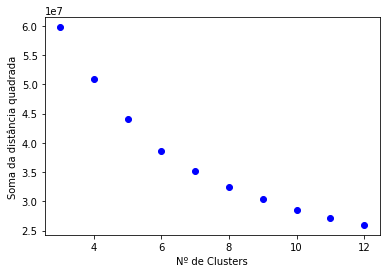

In [454]:
plt.plot(range(min_clusters, max_clusters + 1), inertias, 'bo')
plt.xlabel('Nº de Clusters')
plt.ylabel('Soma da distância quadrada')
plt.annotate('nº de clusters escolhido', xy=(5, 0.7e20), xytext=(6, 2e20), arrowprops=dict(facecolor='red', shrink=0.05));

#### Escolheu-se 5 agrupamentos

In [19]:
n_clusters = 5
kmodel = KMeans(n_clusters=n_clusters, random_state=seed)
clusters = kmodel.fit(x_estudo_v1)
df_total_v1['cluster'] = clusters.labels_

In [20]:
n_clusters = 5
kmodel = KMeans(n_clusters=n_clusters, random_state=seed)
clusters = kmodel.fit(x_estudo_v2)
df_total_v2['cluster'] = clusters.labels_

-------------

## Separa a base em Base de Estudo ('com Alvo') e Avalição ('sem Alvo')

In [356]:
df_estudo_v1 = df_total_v1[~df_total_v1['prob_V1_V2'].isnull()].copy()
df_avalicao_v1 = df_total_v1[df_total_v1['prob_V1_V2'].isnull()].copy()

In [357]:
df_estudo_v2 = df_total_v2[~df_total_v2['prob_V1_V2'].isnull()].copy()
df_avalicao_v2 = df_total_v2[df_total_v2['prob_V1_V2'].isnull()].copy()

### Inicia-se os estudos de correlação

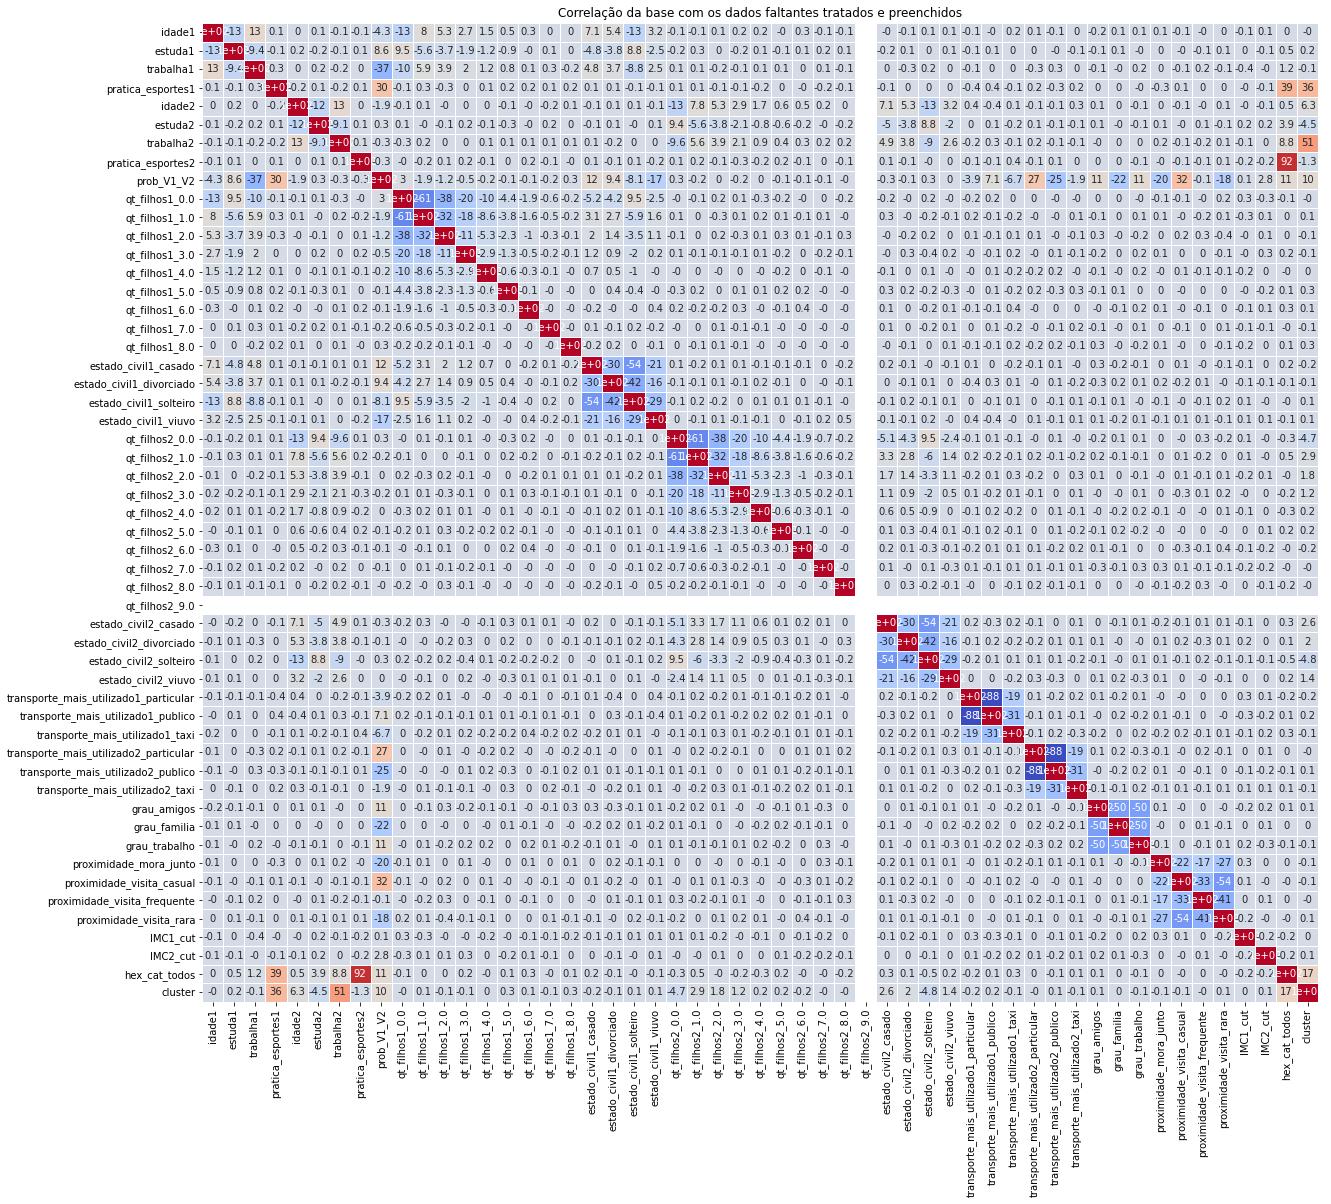

In [358]:
correl_hm = df_estudo_v1.corr()
plt.figure(figsize=(20, 18))
sbn.heatmap(round(correl_hm*100, 1), cmap='coolwarm', annot=True, linewidths=0.6, cbar=False);
plt.title('Correlação da base com os dados faltantes tratados e preenchidos')
plt.savefig('correlacao.jpg')

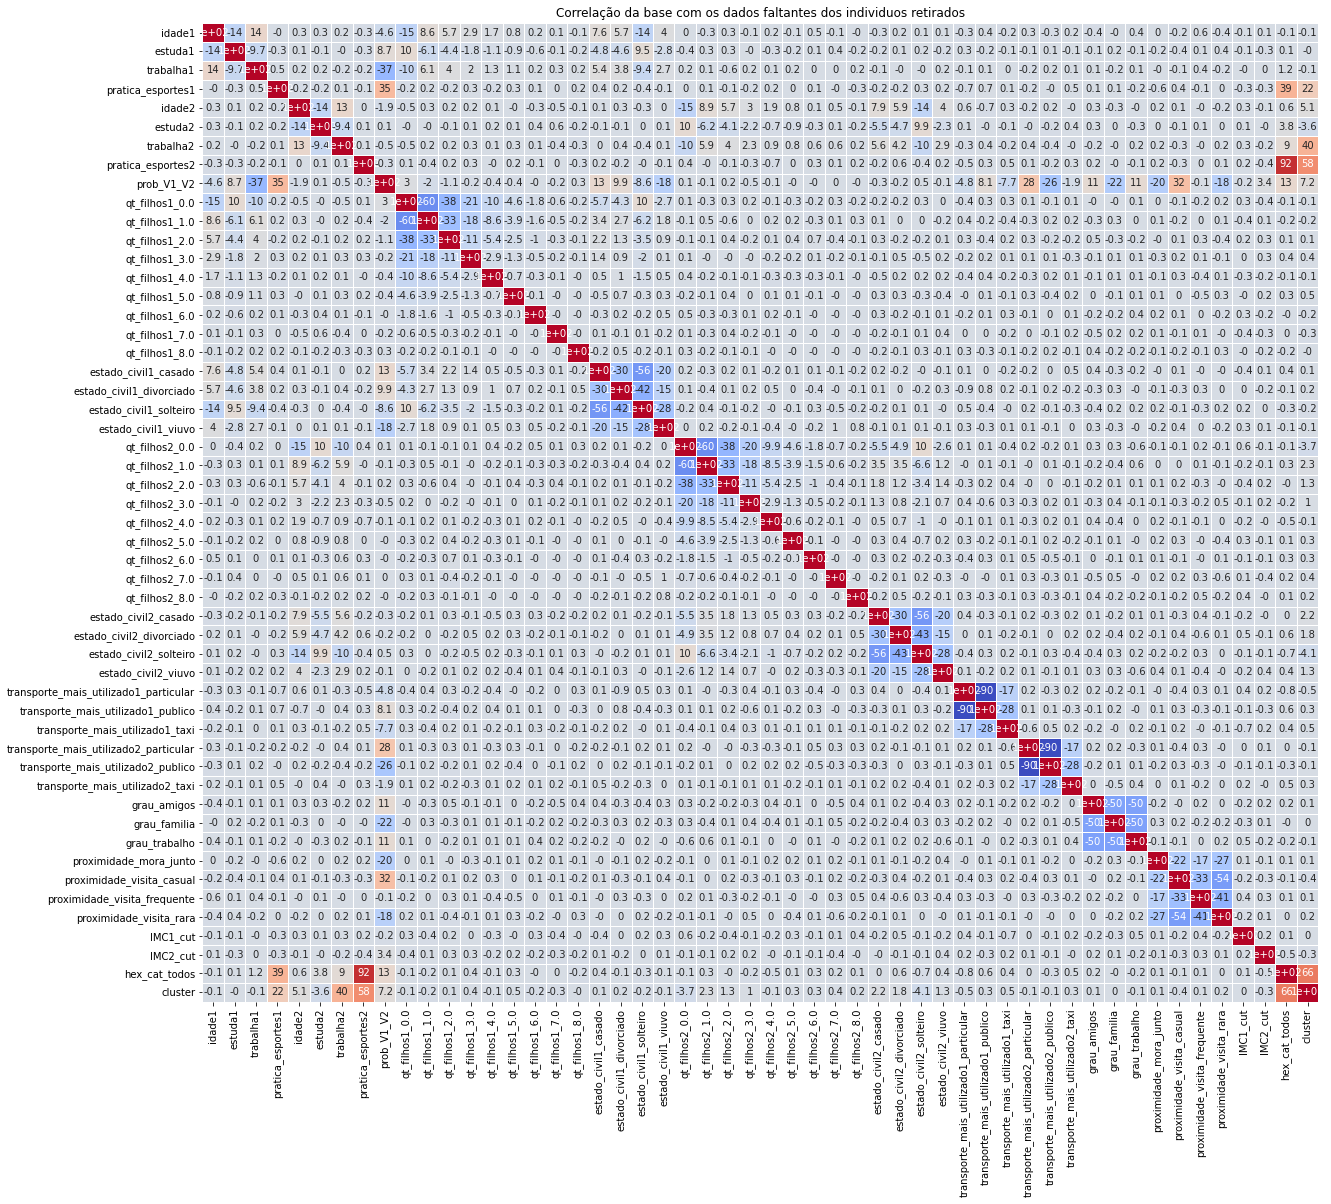

In [359]:
correl_hm = df_estudo_v2.corr()
plt.figure(figsize=(20, 18))
sbn.heatmap(round(correl_hm*100, 1), cmap='coolwarm', annot=True, linewidths=0.6, cbar=False);
plt.title('Correlação da base com os dados faltantes dos individuos retirados')
plt.savefig('correlacao.jpg')

### Retira-se as variáves mais correlacionados entre si

In [416]:
correl_abs = df_estudo_v1.corr().abs()
superior = correl_abs.where(np.triu(np.ones(correl_abs.shape), k=1).astype(np.bool))
var_remove_v1 = [variaveis for variaveis in superior.columns if any(superior[variaveis] > 0.5)]
var_remove_v1.append('qt_filhos2_9.0') # variável removida manualmente.
df_uso_v1 = df_estudo_v1.drop(df_estudo_v1[var_remove_v1], axis=1)
var_remove_v1

['qt_filhos1_1.0',
 'estado_civil1_solteiro',
 'qt_filhos2_1.0',
 'estado_civil2_solteiro',
 'transporte_mais_utilizado1_publico',
 'transporte_mais_utilizado2_publico',
 'grau_trabalho',
 'proximidade_visita_rara',
 'hex_cat_todos',
 'cluster',
 'qt_filhos2_9.0']

In [417]:
correl_abs = df_estudo_v2.corr().abs()
superior = correl_abs.where(np.triu(np.ones(correl_abs.shape), k=1).astype(np.bool))
var_remove_v2 = [variaveis for variaveis in superior.columns if any(superior[variaveis] > 0.5)]
df_uso_v2 = df_estudo_v2.drop(df_estudo_v2[var_remove_v2], axis=1)
var_remove_v2

['qt_filhos1_1.0',
 'estado_civil1_solteiro',
 'qt_filhos2_1.0',
 'estado_civil2_solteiro',
 'transporte_mais_utilizado1_publico',
 'transporte_mais_utilizado2_publico',
 'grau_trabalho',
 'proximidade_visita_rara',
 'hex_cat_todos',
 'cluster']

In [418]:
x_estudo_v1 = df_uso_v1.drop('prob_V1_V2', axis=1)
y_estudo_v1 = df_uso_v1['prob_V1_V2']

In [419]:
x_estudo_v2 = df_uso_v2.drop('prob_V1_V2', axis=1)
y_estudo_v2 = df_uso_v2['prob_V1_V2']

In [423]:
x_estudo_v1

,idade1,estuda1,trabalha1,pratica_esportes1,idade2,estuda2,trabalha2,pratica_esportes2,qt_filhos1_0.0,qt_filhos1_2.0,...,transporte_mais_utilizado1_taxi,transporte_mais_utilizado2_particular,transporte_mais_utilizado2_taxi,grau_amigos,grau_familia,proximidade_mora_junto,proximidade_visita_casual,proximidade_visita_frequente,IMC1_cut,IMC2_cut
0,44.0,1.0,0.0,1.0,24.0,0.0,0.0,1.0,0,0,...,0,0,0,0,0,0,0,1,5,7
1,44.0,1.0,0.0,1.0,35.0,0.0,0.0,1.0,0,0,...,0,1,0,0,0,0,0,0,5,4
3,24.0,0.0,0.0,1.0,30.0,1.0,0.0,1.0,1,0,...,0,0,0,0,0,0,0,0,7,1
5,35.0,0.0,0.0,1.0,55.0,1.0,1.0,1.0,0,0,...,0,1,0,0,1,0,1,0,4,8
7,50.0,1.0,1.0,0.0,42.0,0.0,1.0,0.0,0,0,...,0,0,0,1,0,0,1,0,7,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999985,47.0,0.0,1.0,1.0,28.0,1.0,1.0,0.0,0,0,...,0,0,1,0,1,0,1,0,9,4
999988,19.0,0.0,1.0,0.0,33.0,1.0,0.0,1.0,1,0,...,0,0,0,1,0,0,0,0,8,0
999991,16.0,1.0,0.0,0.0,66.0,0.0,1.0,1.0,0,0,...,0,1,0,0,0,0,1,0,7,3
999996,26.0,0.0,0.0,0.0,30.0,0.0,0.0,1.0,0,0,...,1,0,0,0,1,0,1,0,3,4


In [424]:
x_estudo_v2

,idade1,estuda1,trabalha1,pratica_esportes1,idade2,estuda2,trabalha2,pratica_esportes2,qt_filhos1_0.0,qt_filhos1_2.0,...,transporte_mais_utilizado1_taxi,transporte_mais_utilizado2_particular,transporte_mais_utilizado2_taxi,grau_amigos,grau_familia,proximidade_mora_junto,proximidade_visita_casual,proximidade_visita_frequente,IMC1_cut,IMC2_cut
0,44.0,1.0,0.0,1.0,24.0,0.0,0.0,1.0,0,0,...,0,0,0,0,0,0,0,1,5,7
1,44.0,1.0,0.0,1.0,35.0,0.0,0.0,1.0,0,0,...,0,1,0,0,0,0,0,0,5,4
3,24.0,0.0,0.0,1.0,30.0,1.0,0.0,1.0,1,0,...,0,0,0,0,0,0,0,0,7,1
4,30.0,1.0,0.0,1.0,24.0,0.0,0.0,1.0,0,1,...,0,0,0,0,0,0,0,1,1,7
13,26.0,0.0,0.0,0.0,45.0,0.0,1.0,1.0,1,0,...,0,0,0,0,0,0,1,0,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329111,23.0,1.0,0.0,1.0,40.0,0.0,1.0,1.0,1,0,...,0,1,0,0,1,0,1,0,3,9
329112,33.0,0.0,1.0,1.0,17.0,0.0,1.0,1.0,0,0,...,0,0,0,0,0,0,1,0,8,4
329113,47.0,0.0,1.0,1.0,28.0,1.0,1.0,0.0,0,0,...,0,1,0,0,0,0,1,0,9,2
329114,16.0,1.0,0.0,0.0,66.0,0.0,1.0,1.0,0,0,...,0,1,0,0,0,0,1,0,7,3


---------

## Modelo de Regressão

### Dividindo a base em treinamento e teste

In [366]:
test_size = 0.3
x_train_v1, x_test_v1, y_train_v1, y_test_v1 = train_test_split(x_estudo_v1, y_estudo_v1, test_size=test_size, random_state=seed)
x_train_v2, x_test_v2, y_train_v2, y_test_v2 = train_test_split(x_estudo_v2, y_estudo_v2, test_size=test_size, random_state=seed)

### Criando o modelo de regressão e treinando o modelo

In [367]:
lr1 = LinearRegression()
lr1.fit(x_train_v1, y_train_v1)

LinearRegression()

In [368]:
lr2 = LinearRegression()
lr2.fit(x_train_v2, y_train_v2)

LinearRegression()

### Executando as predições

In [369]:
y_pred_train_v1 = lr1.predict(x_train_v1)
y_pred_test_v1 = lr1.predict(x_test_v1)

In [370]:
y_pred_train_v2 = lr2.predict(x_train_v2)
y_pred_test_v2 = lr2.predict(x_test_v2)

### Avaliando os Resultados das Predições da base com os dados faltantes tratados e preenchidos

In [371]:
MAE_train = metrics.mean_absolute_error(y_train_v1, y_pred_train_v1)
R2_train = metrics.r2_score(y_train_v1, y_pred_train_v1)
RMSE_train = math.sqrt(metrics.mean_squared_error(y_train_v1, y_pred_train_v1))

MAE_test = metrics.mean_absolute_error(y_test_v1, y_pred_test_v1)
R2_test = metrics.r2_score(y_test_v1, y_pred_test_v1)
RMSE_test = math.sqrt(metrics.mean_squared_error(y_test_v1, y_pred_test_v1))

print('Avaliação do Treinamento')
print('MAE:', round(MAE_train ,2))
print('R2:', round(R2_train ,2))
print('RMSE:', round(RMSE_train ,2))
print('------------------------')
print('Avaliação do Teste')
print('MAE:', round(MAE_test ,2))
print('R2:', round(R2_test ,2))
print('RMSE:', round(RMSE_test ,2))

Avaliação do Treinamento
MAE: 0.1
R2: 0.54
RMSE: 0.12
------------------------
Avaliação do Teste
MAE: 0.1
R2: 0.54
RMSE: 0.12


In [372]:
print(round(y_test_v1.mean(), 2))
print(round(MAE_test/y_test_v1.mean()*100, 2))

0.48
19.66


In [373]:
lr1.intercept_

0.4273098882614518

In [374]:
coef = pd.DataFrame(lr1.coef_, x_estudo_v1.columns)
coef.columns = ['Coeficientes']
coef

,Coeficientes
idade1,-0.000035
estuda1,0.021656
trabalha1,-0.131346
pratica_esportes1,0.104553
idade2,-0.000288
estuda2,0.000240
trabalha2,-0.000067
pratica_esportes2,-0.000604
qt_filhos1_0.0,-0.000003
qt_filhos1_2.0,0.000368


### Comparando os resultados reais com os previstos

In [375]:
resultados = pd.DataFrame({'Real': y_test_v1, 'Previsto': y_pred_test_v1})
resultados

,Real,Previsto
208657,0.324920,0.512121
399816,0.663947,0.568754
280646,0.394388,0.409259
265789,0.511199,0.520850
817534,0.248089,0.426865
...,...,...
848213,0.663862,0.633985
299869,0.397511,0.527179
983133,0.153770,0.354227
74643,0.621351,0.621493


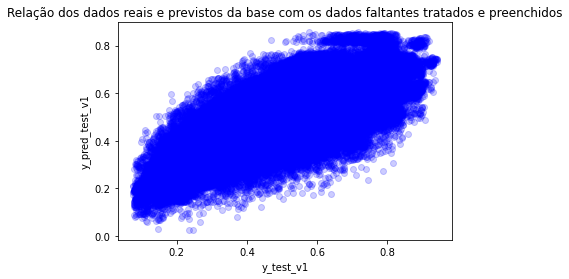

In [376]:
plt.plot(y_test_v1, y_pred_test_v1, 'bo', alpha=0.2);
plt.xlabel('y_test_v1');
plt.ylabel('y_pred_test_v1');
plt.title('Relação dos dados reais e previstos da base com os dados faltantes tratados e preenchidos');

### Avaliando os Resultados das Predições da base com os dados faltantes dos individuos retirados

In [377]:
MAE_train = metrics.mean_absolute_error(y_train_v2, y_pred_train_v2)
R2_train = metrics.r2_score(y_train_v2, y_pred_train_v2)
RMSE_train = math.sqrt(metrics.mean_squared_error(y_train_v2, y_pred_train_v2))

MAE_test = metrics.mean_absolute_error(y_test_v2, y_pred_test_v2)
R2_test = metrics.r2_score(y_test_v2, y_pred_test_v2)
RMSE_test = math.sqrt(metrics.mean_squared_error(y_test_v2, y_pred_test_v2))

print('Avaliação do Treinamento')
print('MAE:', round(MAE_train ,2))
print('R2:', round(R2_train ,2))
print('RMSE:', round(RMSE_train ,2))
print('------------------------')
print('Avaliação do Teste')
print('MAE:', round(MAE_test ,2))
print('R2:', round(R2_test ,2))
print('RMSE:', round(RMSE_test ,2))

Avaliação do Treinamento
MAE: 0.09
R2: 0.59
RMSE: 0.11
------------------------
Avaliação do Teste
MAE: 0.09
R2: 0.59
RMSE: 0.11


In [378]:
print(round(y_test_v2.mean(), 2))
print(round(MAE_test/y_test_v2.mean()*100, 2))

0.48
18.57


In [379]:
lr2.intercept_

0.41450925779484227

In [380]:
coef = pd.DataFrame(lr2.coef_, x_estudo_v2.columns)
coef.columns = ['Coeficientes']
coef

,Coeficientes
idade1,-7.770012e-05
estuda1,2.194847e-02
trabalha1,-1.318363e-01
pratica_esportes1,1.238999e-01
idade2,-2.731386e-04
estuda2,-3.173633e-04
trabalha2,-1.047739e-03
pratica_esportes2,-6.475535e-04
qt_filhos1_0.0,-6.322055e-04
qt_filhos1_2.0,4.373636e-04


### Comparando os resultados reais com os previstos

In [381]:
resultados = pd.DataFrame({'Real': y_test_v2, 'Previsto': y_pred_test_v2})
resultados

,Real,Previsto
30748,0.707640,0.568739
208398,0.779017,0.713654
32265,0.442873,0.382349
193660,0.499668,0.447538
224128,0.456749,0.461349
...,...,...
152619,0.371708,0.421148
140051,0.842755,0.844113
276708,0.329065,0.372999
107274,0.724258,0.490486


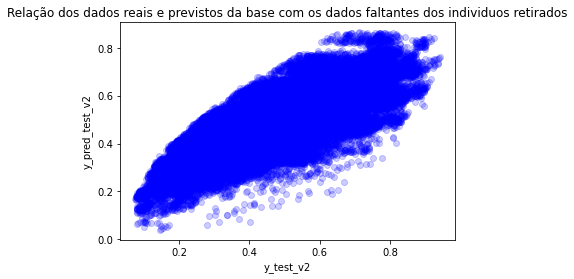

In [382]:
plt.plot(y_test_v2, y_pred_test_v2, 'bo', alpha=0.2);
plt.xlabel('y_test_v2');
plt.ylabel('y_pred_test_v2');
plt.title('Relação dos dados reais e previstos da base com os dados faltantes dos individuos retirados');

#### Nota 1

Percebeu-se, tanto pelas medidas do MAE, R2 e RMSE, como graficamente, que a base que tiveram seus dados faltantes simplesmente removidos tiveram uma melhor resposta no modelo de regressão. Decidiu-se utilizar este modelo para a previsão do restante das taxas de contaminação para o restante da população.

### Testou-se também um modelo de regressão com XGBoost, mas não apresentou melhora significativa

In [383]:
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', booster='gblinear', n_estimators=100, seed=seed) 

#### Otimizando alguns parâmetros

In [384]:
params = {
        'learning_rate': [0.02, 0.2, 0.5],
        'n_estimators': [50, 100, 300, 600],
        'num_boost_round': [10, 25, 50],
        'eta': [0.05, 0.1, 0.3],
        'max_depth': [2, 5, 10, 15, 20], 
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0]
    }

In [385]:
from sklearn.model_selection import KFold

folds = 5
param_comb = 7

k_fold = KFold(n_splits=folds, shuffle=True, random_state=0)
random_search = RandomizedSearchCV(xgb_reg, param_distributions=params, n_iter=param_comb, cv=k_fold.split(x_train_v2, y_train_v2), n_jobs=4, verbose=3, return_train_score=True, random_state=seed )

In [386]:
%%time
random_search.fit(x_train_v2, y_train_v2)

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[04:39:59] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:541: 
Parameters: { colsample_bytree, gamma, max_depth, num_boost_round, subsample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


CPU times: user 13.8 s, sys: 1.34 s, total: 15.1 s
Wall time: 1min


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x7f934800a250>,
                   estimator=XGBRegressor(base_score=None, booster='gblinear',
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, mi...
                                          validate_parameters=None,
                                          verbosity=None),
                   n_iter=7, n_jobs=4,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                              

In [387]:
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)
results


 Best estimator:
XGBRegressor(base_score=0.5, booster='gblinear', colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=0.6, eta=0.1, gamma=5,
             gpu_id=-1, importance_type='gain', interaction_constraints=None,
             learning_rate=0.5, max_delta_step=None, max_depth=20,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=300, n_jobs=8, num_boost_round=50,
             num_parallel_tree=None, random_state=42, reg_alpha=0, reg_lambda=0,
             scale_pos_weight=1, seed=42, subsample=1.0, tree_method=None,
             validate_parameters=1, verbosity=None)

 Best normalized gini score for 5-fold search with 7 parameter combinations:
0.18485981761636383

 Best hyperparameters:
{'subsample': 1.0, 'num_boost_round': 50, 'n_estimators': 300, 'max_depth': 20, 'learning_rate': 0.5, 'gamma': 5, 'eta': 0.1, 'colsample_bytree': 0.6}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,param_num_boost_round,param_n_estimators,param_max_depth,param_learning_rate,param_gamma,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.430668,0.042418,0.029092,0.008854,1.0,10,50,10,0.5,2,...,0.591440,0.003686,5,0.590821,0.591707,0.592811,0.592919,0.590871,0.591826,0.000906
1,14.551019,0.186180,0.032002,0.007619,0.6,10,600,15,0.02,5,...,0.589406,0.003760,6,0.588705,0.589829,0.590789,0.590869,0.588751,0.589789,0.000940
2,15.032422,0.149592,0.024758,0.005423,1.0,25,600,15,0.2,1,...,0.592417,0.003594,2,0.591752,0.592796,0.593782,0.593853,0.591838,0.592804,0.000905
3,7.573703,0.058463,0.029702,0.003678,1.0,50,300,20,0.5,5,...,0.592430,0.003583,1,0.591764,0.592808,0.593795,0.593866,0.591851,0.592817,0.000905
4,2.586114,0.059209,0.023593,0.002210,1.0,10,100,20,0.5,5,...,0.592176,0.003629,3,0.591503,0.592587,0.593511,0.593637,0.591592,0.592566,0.000908
5,2.542244,0.051580,0.027889,0.005159,0.6,25,100,10,0.02,1.5,...,0.513690,0.003386,7,0.513255,0.513801,0.515459,0.514728,0.512865,0.514022,0.000953
6,2.106324,0.374554,0.018285,0.006146,0.8,50,100,15,0.5,0.5,...,0.592165,0.003620,4,0.591521,0.592541,0.593541,0.593610,0.591546,0.592552,0.000914


In [388]:
y_pred_train_reg = random_search.predict(x_train_v2)
y_pred_test_reg = random_search.predict(x_test_v2)

In [389]:
MAE_train = metrics.mean_absolute_error(y_train_v2, y_pred_train_reg)
R2_train = metrics.r2_score(y_train_v2, y_pred_train_reg)
RMSE_train = math.sqrt(metrics.mean_squared_error(y_train_v2, y_pred_train_reg))

MAE_test = metrics.mean_absolute_error(y_test_v2, y_pred_test_reg)
R2_test = metrics.r2_score(y_test_v2, y_pred_test_reg)
RMSE_test = math.sqrt(metrics.mean_squared_error(y_test_v2, y_pred_test_reg))

print('Avaliação do Treinamento')
print('MAE:', round(MAE_train ,2))
print('R2:', round(R2_train ,2))
print('RMSE:', round(RMSE_train ,2))
print('------------------------')
print('Avaliação do Teste')
print('MAE:', round(MAE_test ,2))
print('R2:', round(R2_test ,2))
print('RMSE:', round(RMSE_test ,2))

Avaliação do Treinamento
MAE: 0.09
R2: 0.59
RMSE: 0.11
------------------------
Avaliação do Teste
MAE: 0.09
R2: 0.59
RMSE: 0.11


In [390]:
resultados = pd.DataFrame({'Real': y_test_v2, 'Previsto': y_pred_test_reg})
resultados

,Real,Previsto
30748,0.707640,0.568833
208398,0.779017,0.713553
32265,0.442873,0.382562
193660,0.499668,0.447285
224128,0.456749,0.461401
...,...,...
152619,0.371708,0.420775
140051,0.842755,0.844122
276708,0.329065,0.372902
107274,0.724258,0.490649


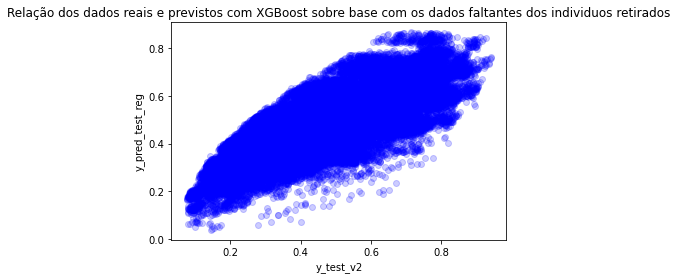

In [391]:
plt.plot(y_test_v2, y_pred_test_reg, 'bo', alpha=0.2);
plt.xlabel('y_test_v2');
plt.ylabel('y_pred_test_reg');
plt.title('Relação dos dados reais e previstos com XGBoost sobre base com os dados faltantes dos individuos retirados');

## Avaliação do Modelo Geral

Se dividirmos os valores de teste do alvo pelos valores previsto no modelo, podemos perceber que o modelo acerto muito mais em sua diagonal principal, sendo que tem uma maior acertividade ainda nos extremos.

In [392]:
num_classes_taxa = 3

In [393]:
y_test_cut = pd.qcut(y_test_v2, num_classes_taxa, labels=False)
y_pred_test_cut = pd.qcut(y_pred_test_v2, num_classes_taxa, labels=False)

crosstab = pd.crosstab(y_test_cut, y_pred_test_cut, dropna=False)
crosstab

col_0,0,1,2
prob_V1_V2,,,
0,12107,3939,401
1,3825,8142,4480
2,515,4366,11566


In [394]:
diag_sum = 0
tota_sum = 0
for i in range(num_classes_taxa):
    for j in range(num_classes_taxa):
#         print(i, j, crosstab[j][i])
        if i == j:
            diag_sum += crosstab[i][j]
        tota_sum += crosstab[i][j]
print(f'Percentual de acerto em relação a todos os valores: {round(diag_sum/tota_sum*100, 2)}%')

Percentual de acerto em relação a todos os valores: 64.48%


#### Separando a taxa de contágio e o valores préditos em faixas

In [395]:
pd.qcut(y_train_v2, num_classes_taxa)

162731     (0.567, 0.942]
9507       (0.399, 0.567]
325349    (0.0747, 0.399]
132104    (0.0747, 0.399]
186924     (0.399, 0.567]
               ...       
240197    (0.0747, 0.399]
208105     (0.399, 0.567]
264061     (0.399, 0.567]
293932     (0.567, 0.942]
244350    (0.0747, 0.399]
Name: prob_V1_V2, Length: 115126, dtype: category
Categories (3, interval[float64]): [(0.0747, 0.399] < (0.399, 0.567] < (0.567, 0.942]]

In [396]:
# labels = ['Baixo', 'Média', 'Alto']
labels = [0, 1, 2]
y_test_cut = separa_labels(y_test_v2, num_classes_taxa, labels)
y_pred_test_cut = separa_labels(y_pred_test_v2, num_classes_taxa, labels)

In [397]:
crosstab = pd.crosstab(y_test_cut, y_pred_test_cut, dropna=False)
crosstab = crosstab[labels]
crosstab

col_0,0,1,2
row_0,,,
0,6425,5211,873
1,1586,6030,3908
2,352,4029,6315


In [398]:
diag_sum = 0
tota_sum = 0
for i in range(num_classes_taxa):
    for j in range(num_classes_taxa):
#         print(i, j, crosstab[j][i])
        if i == j:
            diag_sum += crosstab[i][j]
        tota_sum += crosstab[i][j]
print(f'{round(diag_sum/tota_sum*100, 2)}%')

54.05%


Separando a taxa de contágio em faixas de valores e comparando com o alvo, podemos ver que o modelo acertou acima de 54% em sua diagonal princial e restante, em sua grande maioria em torno desta diagonal.

## Aplicando a predição na base de avaliação

In [399]:
df_avalicao_v1

,idade1,estuda1,trabalha1,pratica_esportes1,idade2,estuda2,trabalha2,pratica_esportes2,prob_V1_V2,qt_filhos1_0.0,...,grau_familia,grau_trabalho,proximidade_mora_junto,proximidade_visita_casual,proximidade_visita_frequente,proximidade_visita_rara,IMC1_cut,IMC2_cut,hex_cat_todos,cluster
2,24.0,0.0,0.0,1.0,50.0,1.0,1.0,0.0,NaN,1,...,0,1,0,1,0,0,7,7,96635272.0,3
4,35.0,0.0,0.0,1.0,20.0,0.0,1.0,0.0,NaN,0,...,0,0,1,0,0,0,4,4,88673298.0,3
6,50.0,1.0,1.0,0.0,50.0,1.0,0.0,1.0,NaN,0,...,1,0,1,0,0,0,7,5,179849496.0,2
9,30.0,1.0,0.0,1.0,21.0,0.0,0.0,0.0,NaN,0,...,0,1,0,1,0,0,1,6,72517922.0,3
10,20.0,0.0,1.0,0.0,42.0,0.0,1.0,0.0,NaN,0,...,1,0,0,1,0,0,4,3,19024193.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999992,30.0,1.0,0.0,1.0,32.0,0.0,1.0,0.0,NaN,0,...,0,1,0,0,1,0,9,7,89433224.0,3
999993,30.0,1.0,0.0,1.0,33.0,0.0,0.0,0.0,NaN,0,...,1,0,0,1,0,0,9,2,72508552.0,3
999994,23.0,1.0,1.0,0.0,34.0,0.0,1.0,1.0,NaN,1,...,0,1,0,0,0,1,5,2,187746696.0,2
999995,23.0,1.0,1.0,0.0,40.0,0.0,1.0,1.0,NaN,1,...,0,1,0,0,0,1,5,6,187752840.0,2


In [425]:
df_uso = df_avalicao_v1[x_test_v2.columns]

In [433]:
y_pred = lr2.predict(df_uso)

In [436]:
df_avalicao_v1['prob_V1_V2'] = y_pred

In [449]:
df_individuos_conexoes_previstos = df_estudo_v1.append(df_avalicao_v1) #, ignore_index=True)

In [450]:
df_individuos_conexoes_previstos

,idade1,estuda1,trabalha1,pratica_esportes1,idade2,estuda2,trabalha2,pratica_esportes2,prob_V1_V2,qt_filhos1_0.0,...,grau_familia,grau_trabalho,proximidade_mora_junto,proximidade_visita_casual,proximidade_visita_frequente,proximidade_visita_rara,IMC1_cut,IMC2_cut,hex_cat_todos,cluster
0,44.0,1.0,0.0,1.0,24.0,0.0,0.0,1.0,0.589462,0,...,0,1,0,0,1,0,5,7,240421249.0,0
1,44.0,1.0,0.0,1.0,35.0,0.0,0.0,1.0,0.708465,0,...,0,1,0,0,0,1,5,4,240181537.0,0
3,24.0,0.0,0.0,1.0,30.0,1.0,0.0,1.0,0.638842,1,...,0,1,0,0,0,1,7,1,247515432.0,0
5,35.0,0.0,0.0,1.0,55.0,1.0,1.0,1.0,0.709608,0,...,1,0,0,1,0,0,4,8,264397858.0,4
7,50.0,1.0,1.0,0.0,42.0,0.0,1.0,0.0,0.465209,0,...,0,0,0,1,0,0,7,9,20121880.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999992,30.0,1.0,0.0,1.0,32.0,0.0,1.0,0.0,0.748095,0,...,0,1,0,0,1,0,9,7,89433224.0,3
999993,30.0,1.0,0.0,1.0,33.0,0.0,0.0,0.0,0.744036,0,...,1,0,0,1,0,0,9,2,72508552.0,3
999994,23.0,1.0,1.0,0.0,34.0,0.0,1.0,1.0,0.359774,1,...,0,1,0,0,0,1,5,2,187746696.0,2
999995,23.0,1.0,1.0,0.0,40.0,0.0,1.0,1.0,0.470589,1,...,0,1,0,0,0,1,5,6,187752840.0,2


In [451]:
file = 'individuos_conexoes_previstos.csv'
df_individuos_conexoes_previstos.to_csv(file, sep=';', index=False)